# Tutorial 2
## May 8, 2024

# Convolution and cross-correlation

In the previous tutorial, you have looked at images. Now, we're going to look at the effect of applying some filters to our image. First, load the image that you used last week.
The images used in the different tutorials are available [here](https://surfdrive.surf.nl/files/index.php/s/hHQNmEOYd054V6f).
For this tutorial you only need to download the folder "Tutorial 1".

In [1]:
data_path = r''

In [2]:
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

image_file = os.path.join(data_path, r'TEV1P1CTI.mhd')

if not os.path.exists(image_file):
    print(f'The image could not be found. '
          f'Please check that the file TEV1P1CTI.mhd can be found in {data_path}')
else:
    image = sitk.ReadImage(image_file)
    image_array = sitk.GetArrayFromImage(image)
    image_array = np.swapaxes(image_array, 0, 2)

The image could not be found. Please check that the file TEV1P1CTI.mhd can be found in 


To make life simple, we just consider a 2D image, and we downsample the image by a factor 4 so the effect of filters is more clear. There are many ways to do this, here we use the [SciPy](https://docs.scipy.org/doc/scipy/index.html) package.

In [3]:
import scipy.ndimage as scnd
from IPython.display import display, clear_output

# Only consider one image slice
image_slice = image_array[:, :, 20].squeeze().transpose()

# Use Scipy to downsample the image by a factor 4
image_slice = scnd.zoom(image_slice, 0.25)

plt.title("Downsampled slice")
plt.imshow(image_slice, cmap="gray")
plt.show()

NameError: name 'image_array' is not defined

### Correlation and convolution

First, we're going to visualize what the difference between convolution and cross-correlation is. You (hopefully) remember from the lecture that convolution of an image $h$ with a kernel $g$ is $f(i,j) = \sum_m\sum_n h(i-m, j-n)g(m,n)$ whereas cross-correlation is defined as $f(i,j) = \sum_m\sum_n h(i+m, j+n)g(m,n)$. First define a *filter* or *kernel*:

In [4]:
g = np.array([[0, 0, 0],
              [0, 0, 1],
              [0, 0, 0]])

:::{admonition} Exercise
:class: tip
Without running the code below, try to figure out what the kernel will do when applied to an image in either convolution or cross-correlation.
:::

:::{admonition} Answer
:class: seealso
Imagine that, e.g., $i$ = 10 and $j$ = 10. Then the operator will compute a new value $f(10, 10)$. All kernel elements are 0 except for one, located at $g(0, 1)$. This means that when using convolution, the value at $f(10, 10)$ will be that of $h(10-0, 10-1)=h(10,9)$, so the image is shifting right. When using cross-correlation, the value $f(10, 10)$ will be that of $h(10-0, 10+1)=h(10, 11)$ so the image is shifting left. 
:::

Let's first apply the kernel with cross-correlation `scnd.correlate` and see what it does. We apply the kernel a couple of times so you see what's happening.

In [5]:
filtered_image = image_slice

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 

for level in range(20): # The kernel is applied 20 times
    filtered_image = scnd.correlate(filtered_image, g, mode='constant', cval=0)
    ax.imshow(filtered_image, cmap='gray', clim=[-300, 450])
    ax.set_title('Applied {} times'.format(level))
    display(fig)
    
    clear_output(wait = True)
    plt.pause(0.1)

NameError: name 'image_slice' is not defined

:::{admonition} Exercise
:class: tip
What happens when you use `scnd.correlate` instead of `scnd.convolve`. Try below. Can you explain this behavior?
:::

:::{admonition} Answer
:class: seealso
The image shifts right. The explanation is in the answer to the previous question. Convolution flips the kernel w.r.t. cross-correlation.
:::

In [6]:
filtered_image = image_slice

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for level in range(20): # The kernel is applied 20 times
    filtered_image = scnd.convolve(filtered_image, g, mode='constant', cval=0)
    ax.imshow(filtered_image, cmap='gray', clim=[-300, 450])
    ax.set_title('Applied {} times'.format(level))
    display(fig)
    
    clear_output(wait = True)
    plt.pause(0.1)

NameError: name 'image_slice' is not defined

:::{admonition} Exercise
:class: tip
Of course we're not limited to shifting images left or right, we can also define kernels to, e.g., smooth or sharpen or image. A well-known smoothing kernel is the Gaussian kernel, which resembles a 2D normal distribution. Try to implement the kernel below and apply it once to your image.<br>
![img](https://4.bp.blogspot.com/-v4dH8qhFnEE/WqHaTPel8RI/AAAAAAAAI8g/AxIVu5i7mHU5UDcu6BkJQJj_UO11sMomwCLcBGAs/s200/3x3%2BGaussian%2BKernel.png)
:::

:::{admonition} Answer
:class: seealso
```python
g = 1/16 * np.array([[1, 2, 1],
                     [2, 4, 2],
                     [1, 2, 1]])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
filtered_image = scnd.convolve(image_slice, g, mode='constant', cval=0)
ax.imshow(filtered_image, cmap='gray', clim=[-300, 450])
ax.set_title('Convolve')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
filtered_image = scnd.correlate(image_slice, g, mode='constant', cval=0)
ax.imshow(filtered_image, cmap='gray', clim=[-300, 450])
ax.set_title('Cross-correlate')
plt.show()
```
:::

:::{admonition} Exercise
:class: tip
What happens if you use correlate, and what happens if you use convolve?
:::

:::{admonition} Answer
:class: seealso 
The image gets blurred. In this case, it doesn't matter which operator your use because the kernel is symmetric.
:::

## PyTorch
![PyTorch](https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png?20211003060202)<br>
[PyTorch](https://pytorch.org/) is (along with TensorFlow) one of the two most commonly used Python libraries for deep learning and linear algebra on GPUs. Before we jump into any real deep learning, there is a couple of things that you should know. Like NumPy, PyTorch operates on matrices. However, while NumPy calls these *arrays*, PyTorch calls them *tensors*. We can easily go back and forth between NumPy arrays and PyTorch tensors. See for yourself:

In [7]:
import torch

# Start with a NumPy array
a = np.array([1, 2, 3])
print(type(a))
print(a)

# Convert to PyTorch tensor
a_t = torch.from_numpy(a)
print(type(a_t))
print(a_t)

# Convert back to NumPy array
a = a_t.numpy()
print(type(a))
print(a)

<class 'numpy.ndarray'>
[1 2 3]
<class 'torch.Tensor'>
tensor([1, 2, 3])
<class 'numpy.ndarray'>
[1 2 3]


PyTorch is supported on CPUs, GPUs, TPUs and (newer) MacBooks. You can set your device as follows.

In [8]:
if torch.cuda.is_available():
    # CUDA
    gpu = torch.device('cuda:0')
else:
    # MacBook with >M1 chip
    gpu = torch.device('mps')

try:
    a_t = a_t.to(device=gpu)
except Exception:
    print("No GPU was found on your machine."
          "Use colab or JupyterLab to access a GPU.")

Note that the tensor is now on the GPU, so we cannot add a tensor that's on the CPU to it. For example, in the following line we initialize a new tensor on the CPU and try to add it but we get an error.

In [9]:
summed = a_t + torch.Tensor([4, 5, 6])

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, mps:0 and cpu!

:::{admonition} Exercise
:class: tip
Try to fix this bug so you can add the tensors on the GPU.
:::

:::{admonition} Answer
:class: seealso
You'll also have to move the new `[4, 5 6]` tensor to the GPU.
:::

In [10]:
summed = a_t + torch.Tensor([4, 5, 6]).to(device=gpu)

However, best practice is to initialize your tensors and objects directly on the GPU. For example, the code below will generate a random $1000\times 1000$ matrix on the GPU. 

In [11]:
rn = torch.randn(1000, 1000, device=gpu)
print(rn)

tensor([[ 4.5733e-01,  8.3332e-01,  1.6799e+00,  ..., -2.5142e+00,
          2.0756e-01, -1.1494e+00],
        [ 2.5139e-01, -1.0730e+00, -5.9246e-01,  ...,  7.0610e-04,
         -4.5357e-01, -1.9172e+00],
        [ 8.1169e-01,  1.7883e+00, -7.0340e-01,  ...,  9.0216e-01,
         -1.2327e+00, -8.7903e-01],
        ...,
        [ 5.1994e-01, -1.6500e+00,  2.3617e-01,  ..., -6.8722e-01,
         -1.2570e+00,  2.0804e-01],
        [-6.2757e-01,  5.1785e-01, -1.7138e-01,  ..., -1.6879e-02,
          6.6434e-01,  1.1214e+00],
        [ 1.8146e+00,  4.1044e-01,  6.0555e-01,  ...,  1.5129e+00,
          6.7483e-01,  4.6970e-01]], device='mps:0')


/Users/jmwolterink/opt/anaconda3/envs/notebook_collaboration/lib/python3.7/site-packages/torch/_tensor_str.py:116: UserWarning: The operator 'aten::nonzero' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  tensor_view, torch.isfinite(tensor_view) & tensor_view.ne(0)


Now let's perform *convolution* in PyTorch! For this, we use the [<code>conv2d</code>](https://pytorch.org/docs/stable/generated/torch.nn.functional.conv2d.html) function. The code below is not very different from what we have done before, but now everything happens in PyTorch instead of NumPy.

In [12]:
import torch.nn.functional as F

image_slice_t = torch.from_numpy(image_slice).float()

g_t = torch.tensor([[0, 0, 0],
                    [0, 0, 1],
                    [0, 0, 0]]).float()

# We reshape the image because the conv2d function expects [batch_size, channels, width, height] inputs and kernels. You'll see 
# later what we mean with batch_size and channels.
filtered_image_t = F.conv2d(image_slice_t.reshape((1, 1, 128, 128)), g_t.reshape((1, 1, 3, 3)), padding='same').squeeze()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
for level in range(1, 20):
    filtered_image_t = F.conv2d(filtered_image_t.reshape((1, 1, 128, 128)), g_t.reshape((1, 1, 3, 3)), padding='same').squeeze()
    ax.imshow(filtered_image_t.numpy(), cmap='gray', clim=[-300, 450])
    ax.set_title('Applied {} times'.format(level))
    display(fig)
    
    clear_output(wait = True)
    plt.pause(0.1)

NameError: name 'image_slice' is not defined

:::{admonition} Exercise
:class: tip
And, what do you see? A convolution or a cross-correlation? (Why) is this surprising?
:::

:::{admonition} Answer
:class: seealso
A cross-correlation, the image is shifting to the left. This means that PyTorch does cross-correlation instead of convolution if we call `conv2d`.
:::

:::{admonition} Exercise
:class: tip
All kernels that we have used so far are $3\times 3$ elements, but this is an arbitrary choice. Can you implement a kernel that lets the image make a [horse jump](https://en.wikipedia.org/wiki/Knight_(chess)) to the top right? Implement the kernel and apply with PyTorch.
:::

:::{admonition} Answer
:class: seealso
There are two ways to do this. The first approach is to define a kernel of $5\times 5$ elements with one non-zero value and apply that kernel once. The second approach is to define two kernels of $3\times 3$ elements, one for right-shifting and one for up-shifting. Then you can apply the right-shift once, and the up-shift twice.
:::

In [13]:
image_slice_t = torch.from_numpy(image_slice).float()

### APPROACH ONE
g_t = torch.tensor([[0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0],
                    [0, 1, 0, 0, 0]]).float()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
filtered_image_t = F.conv2d(image_slice_t.reshape((1, 1, 128, 128)), g_t.reshape((1, 1, 5, 5)), padding='same').squeeze()
ax.imshow(filtered_image_t.numpy(), cmap='gray', clim=[-300, 450]);  
ax.set_title('In one step')
plt.show()


### APPROACH TWO
g_right = torch.tensor([[0, 0, 0],
                        [1, 0, 0],
                        [0, 0, 0]]).float()

g_up = torch.tensor([[0, 0, 0],
                        [0, 0, 0],
                        [0, 1, 0]]).float()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
filtered_image_t = F.conv2d(image_slice_t.reshape((1, 1, 128, 128)), g_up.reshape((1, 1, 3, 3)), padding='same').squeeze()
filtered_image_t = F.conv2d(filtered_image_t.reshape((1, 1, 128, 128)), g_up.reshape((1, 1, 3, 3)), padding='same').squeeze()
filtered_image_t = F.conv2d(filtered_image_t.reshape((1, 1, 128, 128)), g_right.reshape((1, 1, 3, 3)), padding='same').squeeze()
ax.imshow(filtered_image_t.numpy(), cmap='gray', clim=[-300, 450]);  
ax.set_title('In three steps')
plt.show()

NameError: name 'image_slice' is not defined

# Learning parameters from synthetic data
In this part of the tutorial, we will define a very simple optimization problem and how to tackle it with PyTorch.
In the next part of the tutorial, we will use MONAI, which is a PyTorch extension for medical images.

Like in the lecture, we will solve a linear regression problem with one independent input variable $x$ and one
dependent output variable $y$. The output variable is a function of the input, i.e.

$$y = wx + b$$

The measurements contain some noise, and thus, we're looking at an optimization problem

$$\underset{w,b}{arg\,min}\frac{1}{m}\sum_{i}^m (wx_i+b-y_i)^2$$

In this example, we will perform basic linear regression using PyTorch.
First, we will generate our 'dataset', consisting of $x$ and $y$ values sampled along a line (with some added noise).
We here use PyTorch (torch) functions to initialize our data.

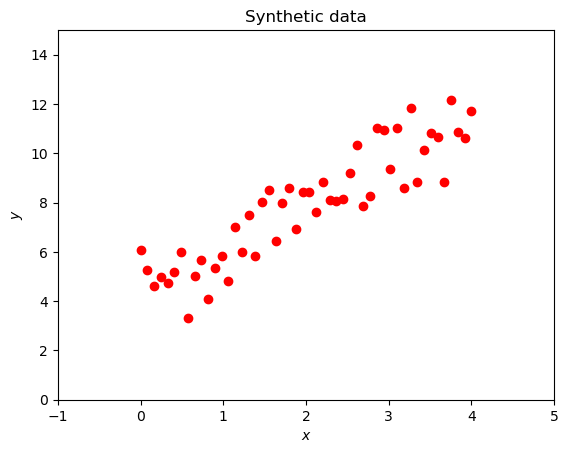

In [14]:
# Generation of a data set including N samples
N = 50
x = torch.linspace(0, 4, N, device=gpu)
b = 4
w = 2
noise = torch.normal(torch.zeros(N)).to(gpu)
y = (w * x + b + noise).float()

# Plot the synthetic data set
plt.figure()
plt.title("Synthetic data")
plt.scatter(x.cpu(), y.cpu(), color='r') # We use this code to map the data back to the CPU
plt.xlim(-1, 5)
plt.xlabel('$x$')
plt.ylim(0, 15)
plt.ylabel('$y$')
plt.show()

Here we want to learn a linear regression, so we don't need a deep neural network with non-linear activations,
but only one fully-connected layer. In PyTorch, this is called a
[Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layer,
as it learns a linear relation between inputs and outputs.
Take a look at the documentation to see which arguments this layer has.

The arguments we define are the following:
1. The **number of input features**, which is in this case 1, i.e., x.
2. The **number of output features**, which is in this case also 1, i.e., y.
3. [Optional] We choose to define whether or not the layer has a **bias term**. By default, this is set to True.
4. [Optional] We define here which **device** is used to instantiate the layer. In our case, we use a GPU.

In [15]:
model = torch.nn.Linear(in_features=1, out_features=1, bias=True, device=gpu)

Like any neural network in PyTorch, training this network requires an loss function. Because this is a regression problem, we use a mean squared error loss, or [<code>MSELoss</code>](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) in PyTorch, with default settings.

In [16]:
loss_func = torch.nn.MSELoss()

We now define a simple training procedure to fit a model to a dataset. There are a few *very* important steps in this piece of code. 

- First, we create the optimizer, which is an essential part of training the model. In this case, we use an [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) optimizer, which is the gradient descent optimizer that you saw in the lecture. The optimizer keeps track of the parameters of the model and is initialized with a learning rate.
- Second, we loop over a number of iterations and in each iteration we perform the following steps
    - `optimizer.zero_grad()` resets all gradients of the model parameters. If we wouldn't do this, gradients would be added up over iterations.
    - `output = model(x.unsqueeze(1))` applies the network to the input sample.
    - `loss = loss_function(output, y.unsqueeze(1))` computes the MSE loss between the output of the network and the target, i.e., $y$.
    - `loss.backward()` backpropagates the prediction loss to all parameters.
    - `optimizer.step()` applied gradient descent the parameters by the gradients collected in the backward pass.
    
These few lines are at the core of anything you'll do in PyTorch. Note that this is only a very short description of the process, if you want to know more, take a look at [this tutorial](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html).

In [17]:
import tqdm

def train(model, iterations, lr, loss_function, x, y):
    model.reset_parameters()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    train_loss = []
    for iteration in tqdm.tqdm(range(iterations)):
        optimizer.zero_grad()
        output = model(x.unsqueeze(1))
        loss = loss_function(output, y.unsqueeze(1))
        train_loss.append(loss.item())
        loss.backward()
        optimizer.step()
    return model, train_loss

:::{admonition} Exercise
:class: tip
Does this piece of code use batch gradient descent, mini-batch gradient descent or stochastic gradient descent?
:::

:::{admonition} Answer
:class: tip
This function uses the full dataset `x` in each iteration and is thus performing batch gradient descent.
:::

:::{admonition} Exercise
:class: tip
Train the model for 1000 iterations with a learning rate of 0.001 and visualize the loss over time. What happens to the loss curve if you increase or decrease the learning rate (i.e. in steps of factor 10)?
:::

:::{admonition} Answer
:class: seealso
Setting the learning rate higher will let the loss go down faster, setting the learning rate lower will lead to slower optimization. However, if you set, e.g., `lr`=1 or `lr`=10, you'll see that the loss explodes at some point. 

```python
model_trained, loss = train(model=model, iterations=1000, lr=0.001, loss_function=loss_func, x=x, y=y)

plt.plot(loss)
plt.xlabel('Iterations')
plt.ylabel('MSE loss')
plt.show()
```
:::

In [18]:
# Using the code below, you can visualize the fitted line. 

with torch.no_grad():
    output = model_trained(x.unsqueeze(1))
plt.plot(x.cpu(), output.cpu(), label='prediction')
plt.scatter(x.cpu(), y.cpu(), color='r', label='training data')
plt.xlim(-1, 5)
plt.xlabel('$x$')
plt.ylim(0, 15)
plt.ylabel('$y$')
plt.legend()
plt.show()

NameError: name 'model_trained' is not defined

:::{admonition} Exercise
:class: tip
Remember how when we defined `model` we set `bias` to `True`? Try to run the code again but without bias. What do you notice? The following line counts the number of trainable parameters in a model. What's the difference between the model with and without bias?
:::

In [19]:
# This block counts the number of parameters in the model.
sum(p.numel() for p in model.parameters() if p.requires_grad)

2

:::{admonition} Answer
:class: seealso
If the model doesn't have a bias, the fitted line starts at (0, 0) and it will underestimate the points close to $x=0$. This is not a good model for the data.
:::

In [20]:
model = torch.nn.Linear(in_features=1, out_features=1, bias=True, device=gpu)
n_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('The model with bias has {} parameters'.format(n_params))

model = torch.nn.Linear(in_features=1, out_features=1, bias=False, device=gpu)
n_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('The model without bias has {} parameters'.format(n_params))

The model with bias has 2 parameters
The model without bias has 1 parameters


# A convolutional neural network

![MONAI](https://monai.io/assets/img/MONAI-logo_color_full.png)

Medical Open Network for Artificial Intelligence ([MONAI](https://monai.io/)) is the library we will use in this course for deep learning on medical images. MONAI is built on the same concepts as PyTorch and its classes in many cases inherit from PyTorch classes. However, MONAI has specific functions and models that make it appropriate for medical images. The 'raw' loaded medical images are often not directly suited for training a neural network; they need to be processed before being used. MONAI offers a streamlined framework for transforming the data and feeding it into the network. In practice, you will use a combination of the two. A typical workflow in both PyTorch and MONAI is as follows:
1. Define a dataset
2. Define transforms on the dataset to make it suitable for the network
3. Build a dataloader
4. Build the network / define the optimizer, loss function and hyperparameters
5. Start training procedure 

In this tutorial, we build a classification network for tumor classification, using datasets from [MedMNIST](https://medmnist.com/). This is a collection of datasets with binary (yes or no) or multiclass labels in 2D or 3D. Each sample in these datasets is a $28\times 28$ pixel (2D) or $28\times 28\times 28$ voxel (3D) image. To be able to use MONAI and this repository, we install the corresponding Python package using the following cell.

In [21]:
!pip install monai
!pip install medmnist

After you've installed the `medmnist` package, import it and download the `train` segment of the pneumonia dataset. This is a binary task where patients either have pneumonia or don't. Note that there is also a `validate` and `test` segment that we will download later.

In [22]:
import medmnist
dataset = medmnist.PneumoniaMNIST(split="train", download=True)

Using downloaded and verified file: /Users/jmwolterink/.medmnist/pneumoniamnist.npz


## Datasets
The first step in the procedure consists of building a dataset that contains the images and labels. A dataset is an object, that we build using the PyTorch <code>Dataset</code> class template. Remember the <code> Car </code> class from last tutorial, with class-specific functions accelerate and brake? Here, we build a custom dataset object, where we need to define three functions in the dataset:
- `__init__`: runs when constructing the object, place where you can construct paths to the data and save them in an array, or load the images in an array.
- `__len__`: returns length of the dataset, i.e. number of samples.
- `__getitem__`: returns a sample from the dataset. This function takes an index as input, and returns the corresponding sample in the dataset. In our case, this would be two objects: an image and its corresponding label. This function returns a dictionary containing image and label. The advantage of using a dictionary is that you can keep track of transforms on the data later on in the pipeline.

The `MedMNISTData` class below inherits from the MONAI `Dataset` class, which in turn inherits from the PyTorch `Dataset` class.

In [23]:
import os
import monai

class MedMNISTData(monai.data.Dataset):
    
    def __init__(self, datafile, transform=None):
        self.data = datafile
        self.transform = transform
        
        
    def __getitem__(self, index):
        # Make getitem return a dictionary with keys ['img', 'label'] for the image and label respectively
        image = self.data[index][0]
        if self.transform:
            image = self.transform(image)
        return {'img': image, 'label': self.data[index][1]}
    
    def __len__(self):
        return len(self.data)

Note that in `__getitem__` we apply a transform to each image that is selected. Such a transform is simply a function or a composition of functions that can be applied to a sample to transform it into another sample. This typically includes things like intensity normalization, cropping, resampling, etc. and are essential to most deep learning pipelines in medical imaging. Here we compose two simple transforms:
- The `ToTensor` transform converts an image into a PyTorch `Tensor` type
- The `Normalize` transform normalizes the intensities of an image to mean=0.5 and std=0.5 (in this case)

MONAI and other Python libraries like [TorchIO](https://torchio.readthedocs.io/) contain many convenient functions to transform your images.

In [24]:
import torchvision.transforms as transforms

data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

Then, using the cell below, we can initialize a `Dataset` object based on the data that we have just downloaded.

In [25]:
train_dataset = MedMNISTData(dataset, transform=data_transform)

The code below visualizes the first sample from the data set.

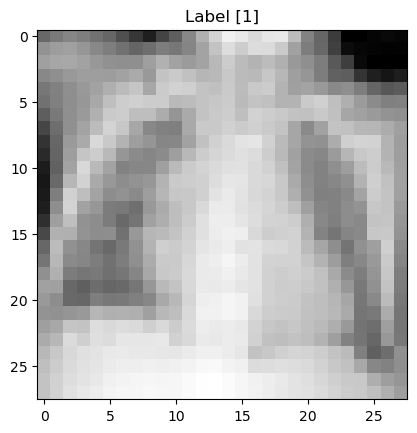

In [26]:
plt.figure()
plt.imshow(train_dataset[0]['img'].squeeze(), cmap='gray')
plt.title('Label {}'.format(train_dataset[0]['label']))
plt.show()

:::{admonition} Exercise
:class: tip
Visualize a number of random samples from the dataset. What is their corresponding label?
:::

:::{admonition} Answer
:class: seealso
```python
n_samples = 16
n_row = int(np.sqrt(n_samples))
n_col = int(np.sqrt(n_samples))
fig, axs = plt.subplots(n_row, n_col, figsize=(10, 12)) 
for r in range(n_row):
    for c in range(n_col):
        axs[r, c].imshow(train_dataset[r * n_col + c]['img'].squeeze(), cmap='gray')
        axs[r, c].set_title('Label = {}'.format(train_dataset[r * n_col + c]['label']))
plt.show()
```
:::

:::{admonition} Exercise
:class: tip
Make a `val_dataset` and a `test_dataset` class for the validation and test set, respectively. Verify that these have 524 and 624 samples.
:::

:::{admonition} Answer
:class: seealso
```python
dataset_val_raw = medmnist.PneumoniaMNIST(split="val", download=True)
val_dataset = MedMNISTData(dataset_val_raw, transform=data_transform)
dataset_test_raw = medmnist.PneumoniaMNIST(split="test", download=True)
test_dataset = MedMNISTData(dataset_test_raw, transform=data_transform)
print(len(val_dataset))
print(len(test_dataset))
```
:::

## Dataloaders

Now that we have a dataset, we can build a dataloader that automatically generates batches with given size. As input it uses one of the data sets constructed in the previous section. Here, the batch size is 32. We shuffle all samples so that each minibatch is different.

In [27]:
train_dataloader = monai.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

:::{admonition} Exercise
:class: tip
Also initialize a [dataloader](https://docs.monai.io/en/stable/data.html#dataloader) for the validation set and the test set. Call these `val_dataloader` and `test_dataloader`
:::

:::{admonition} Answer
:class: seealso
```python
val_dataloader = monai.data.DataLoader(val_dataset, batch_size=1000)
test_dataloader = monai.data.DataLoader(test_dataset, batch_size=1000)
```
:::

:::{admonition} Exercise
:class: tip
With these settings, will this dataloader support batch gradient descent, mini-batch gradient descent or stochastic gradient descent?
:::

:::{admonition} Answer
:class: seealso
Mini-batch gradient descent. The DataLoader samples mini-batches of 32 images per iteration.
:::

## The network
Now our data pre-processing is all set up, we can define our neural network architecture. It is conventional to code neural networks as a <code>torch.nn.Module</code> object, where the <code>init</code> function defines the model's layers, and the <code>forward</code> function defines how data is fed through the network.
Note that this network is built up from convolution layers, pooling layers, and the (fully connected) linear layers that we just used in the PyTorch section.

In [28]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(in_features=9216, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=1)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        output = self.fc2(x)
        return output
    
net = Net()

:::{admonition} Exercise
:class: tip
How many layers does this network have? And how many weights?
:::

:::{admonition} Answer
:class: seealso
The network has
- One input layer
- Two convolution layers
- One max pooling layer
- Two linear layers, of which the last one is the output layer

In total,  the network has six layers. Note that ReLU is just the activation functions of the convolution and linear layers, and that Flatten simply performs a flattening operation on the data.
:::

In [29]:
sum(p.numel() for p in net.parameters() if p.requires_grad)

1198721

Move the model to the GPU.

In [30]:
model = Net().to(gpu)

To train our network, we should again select an **optimizer** and a **loss** function. 
- A very common option is to use the Adam optimizer, which is an adaptive version of stochastic gradient descent. 
- Because we are solving a classification problem, a good loss function is binary cross-entropy. Here, we use `BCEWithLogitsLoss`, which operates directly on the output of the network (its logits) and integrates a sigmoid activation function. 

In [31]:
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4) 
loss_function = torch.nn.BCEWithLogitsLoss()

## Training procedure for classification

Now we have all the ingredients in place to start training our network. Easiest is to define a train function that performs the training procedure. In addition to a forward and backward pass with the training data, we want to perform a validation loop every $N$ epochs, using unseen data.

In [32]:
from tqdm import tqdm

def train_medmnist(model, train_dataloader, val_dataloader, optimizer, epochs, device=gpu, val_freq=1):
    train_loss = []
    val_loss = []

    for epoch in tqdm(range(epochs)):
        model.train()
        steps = 0
        epoch_loss = 0

        for batch in train_dataloader:
            optimizer.zero_grad()
            images = batch['img'].float().to(device)
            labels = batch['label'].float().to(device)
            output = model(images) 
            loss = loss_function(output, labels)
            epoch_loss += loss.item()
            loss.backward()
            optimizer.step()
            steps += 1
           
        train_loss.append(epoch_loss/steps)

        # validation loop
        if epoch % val_freq == 0:
            steps = 0
            val_epoch_loss = 0
            model.eval()
            for batch in val_dataloader:
                images = batch['img'].float().to(device)
                labels = batch['label'].float().to(device)
                output = model(images) 
                loss = loss_function(output, labels)
                val_epoch_loss += loss.item()
                steps += 1
            val_loss.append(val_epoch_loss/steps)

    return train_loss, val_loss, model

Train your (maybe?) first convolutional neural network! Time to get a coffee, this might take a few minutes.<br> <img src="https://i.redd.it/j586af7nxvu41.jpg" width="400px"></img>

In [33]:
val_freq = 10
n_epochs = 100
train_loss, val_loss, model = train_medmnist(model, train_dataloader, val_dataloader, optimizer, epochs=n_epochs, val_freq=val_freq)

NameError: name 'val_dataloader' is not defined

:::{admonition} Exercise
:class: tip
Visualize the training and validation loss using Matplotlib. What do you see? Did your model overfit?
:::

:::{admonition} Answer
:class: seealso
```python
plt.figure()
plt.plot(train_loss, label='Training loss')
plt.plot(np.linspace(0, n_epochs, int(n_epochs/val_freq)), val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
```

The training loss keeps dropping, but the validation/test loss only drops a bit before it starts to rapidly increase. The model is overfitting on the training data. 
:::

## Part 5e: Performance evaluation
By now, you have a trained version of the CNN, that should be able to distinguish between (very small) X-ray images showing pneumonia or not. For classification tasks, the performance is often measured in terms of specificity and sensitivity, as shown in the diagram below:

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Sensitivity_and_specificity_1.01.svg/330px-Sensitivity_and_specificity_1.01.svg.png />

For this model, we will make an ROC curve to assess the performance.

In [34]:
from sklearn.metrics import roc_curve, auc

In [35]:
def validation_results_ROC(model, dataloader):
    for data in dataloader:
        images = data['img'].float().to(gpu)
        labels = data['label']
        with torch.no_grad():
            output = model(images).cpu()
        fpr, tpr, _ = roc_curve(labels, output.squeeze(1))
        print(auc(fpr, tpr))
        plt.plot(fpr,tpr)
        plt.xlabel('False positive rate')
        plt.ylabel('False negative rate')
        plt.plot([0,1], [0,1], 'r--')

:::{admonition} Exercise
:class: tip
Does the model perform well for pneumonia classification? Calculate the area under the curve for the validation set as well as for the test set.
:::

:::{admonition} Answer
:class: seealso
```python
validation_results_ROC(model, val_dataloader)
validation_results_ROC(model, test_dataloader)
```
:::

For improvement of the model, it is useful to visualize some inputs and the corresponding predictions of the network.

In [36]:
def validation_results_visualize(model, dataset):
    index = np.random.randint(0, len(dataset))
    image = dataset[index]['img']
    plt.imshow(image.numpy().squeeze(), cmap='gray')
    image = image.float().to(gpu)
    label = dataset[index]['label'].item()
    with torch.no_grad():
        output = F.sigmoid(model(image.unsqueeze(0)))
    plt.title(f'Ground truth: {label}, prediction: {int(output)}')

In [37]:
validation_results_visualize(model, val_dataset)

NameError: name 'val_dataset' is not defined

:::{admonition} Exercise
:class: tip
Select a 3D dataset from MedMNIST (NoduleMNIST3D or VesselMNIST3D) and train and validate a model for that set. Consider which changes you have to make.
:::